我们先来看两个函数reshape和flatten：

假设我们先生成一个一维数组:

In [1]:
import numpy as np
vec = np.arange(15)
print(vec)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


如果我们要把这个一维数组，变成一个3x5的二维矩阵，我们可以使用reshape来实现：

In [2]:
mat = vec.reshape(3, 5)
print(mat)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


现在如果我们反过来，知道一个二维矩阵，要变成一个一维数组，就不能用reshape了，只能用flatten。我们来看看两者的区别：

In [3]:
a1 = mat.reshape(1, -1) # -1表示为任意，让系统自动计算
print(a1)
a2 = mat.flatten()
print(a2)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


可以看出，用reshape进行变换，实际上变化后还是二维数组，两个方括号，因此只能用flatten。

我们要对图像求直方图，就需要先把图像矩阵进行flatten操作，是之变为一维数组，然后进行统计。

# 一、画灰度图直方图

绘图都可以调用matplotlib.pyplot库来进行，其中的hist函数可以直接绘制直方图。

调用方式如下：

n, bins, patches = plt.hist(arr, bins=50, normed=1, facecolor='green', alpha=0.75)

hist的参数非常多，但常用的就这5个，只有第一个是必须的，后面四个可选。

* arr：需要计算直方图的一维数组
* bins：直方图的柱数，可选项，默认为10
* normed：是否将得到的直方图向量归一化。默认为0
* facecolor：直方图颜色
* alpha：透明度

返回值：

* n：直方图向量，是否归一化由参数决定
* bins：返回各个bin的区间范围
* patches：返回每个bin里面包含的数据，是一个list

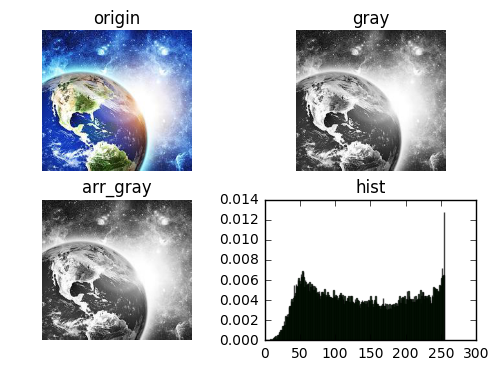

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('C:/earth.jpg')
gray = img.convert('L')
arr_gray = np.array(gray)

plt.figure("earth")

plt.subplot(2, 2, 1)
plt.title('origin')
plt.imshow(img)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('gray')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('arr_gray')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('hist')
arr = arr_gray.flatten()
n, bins, patches = plt.hist(arr, bins=256, normed=1, facecolor='green', alpha=0.75)

plt.show()

# 二、彩色直方图

实际上适合灰度直方图一样的，只是分别画出三通道的直方图，然后叠加在一起。

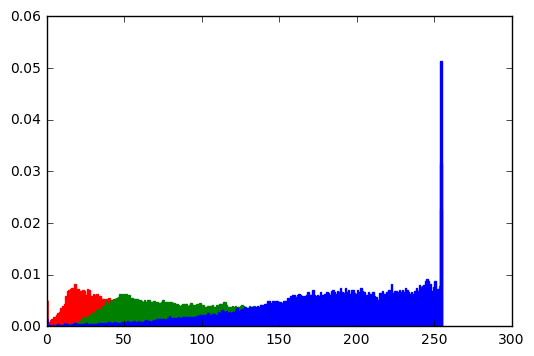

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
src = Image.open('C:/earth.jpg')
r, g, b = src.split()

plt.figure("earth")
ar = np.array(r).flatten()
plt.hist(ar, bins=256, normed=1, facecolor='r', edgecolor='r', hold=1)
ag = np.array(g).flatten()
plt.hist(ag, bins=256, normed=1, facecolor='g', edgecolor='g', hold=1)
ab = np.array(b).flatten()
plt.hist(ab, bins=256, normed=1, facecolor='b', edgecolor='b', hold=1)
plt.show()

由此可见，matplotlib的画图功能是非常强大的，直方图只是其中非常小的一部分，更多的可以参看matplotlib的文档。